# Week 1

### **PYTHON RECAP**

#### **1. Computing GCD**

- `gcd(m,n)` <= `min(m,n)`
- Compute the list of common factors from 1 to `min(m,n)`
- Return the last such common factor

In [ ]:
def gcd(m,n):
  cf = [] # List of common factors
  for i in range(1, min(m,n) + 1):
    if (m%i) == 0 and (n%i) == 0:
      cf.append(i)
  return cf[-1]

**Points to note:**
- Need to initialize `cf` for `cf.append()` to work
  - Variables derive their type from the value they hold.
- Control flow
  - Conditional (`if`)
  - Loops (`for`)
- `range(i,j)` runs from i to j-1
- List indices run from 0 to `len(l)` - 1 and backwards from -1 to `-len(l)`

**Modifications:**
- Eliminate the list
  - Only the last value of cf is important.
- Keep track of most recent commaon factor (`mrcf`)
  - 1 is always a common factor
    - No need to initialize `mrcf`

 

In [ ]:
def gcd(m,n):
  for i in range(1, min(m,n) + 1):
    if (m%i) == 0 and (n%i) == 0:
      mrcf = i
    return mrcf

**Efficiency:**
- Both versions of `gcd` take time proportional to `min(m,n)`

#### **2. Check primality**

- A prime number *n* has exactly two factors, 1 and *n*.
  - 1 is not a prime number.
- Compute the list of factors of `n`.

In [ ]:
def factors(n):
  fl = [] # factor list
  for i inrange(1, n+1):
    if (n%i) == 0:
      fl.append(i)
  return fl

 - `n` is a prime if the list of factors is precisely `[1,n]`
 

In [ ]:
def prime(n):
  return factors(n) == [1,n]

**Another method to check primality:**
- Directly check if *n* has a factor between 2 and *n* - 1.
- Terminate check after we find first factor.
  - Breaking out of a loop.

In [ ]:
def prime(n):
  result = True
  for i in range(2,n):
    if (n%i) == 0:
      result = False
      break # Abort loop
  return result

**Alternate Method 1:**
- Use `while` loop
- Avoid using `break` to avoid confusion.

In [ ]:
def prime(n):
  (result,i) = (True,2)
  while (result and (i < n)):
    if (n%i) == 0:
      result = False
    i = i + 1
  return result

**Alternate Method 2:**
Speeding things up slightly
- Factors occer in pairs
- Sufficient to check factors upto $\sqrt{n}$
- If *n* is prime, scan 2, ..., $\sqrt{n}$ instead of 2, ..., *n* - 1

In [ ]:
import math
def prime(n):
  (result,i) = (True, 2)
  while (result and (i < math.sqrt(n))):
    if (n%i) == 0:
      result = False
    i = i + 1
  return result

#### **3. Counting primes**

List all primes upto *m*.

In [ ]:
def primesupto(m):
  pl = [] # prime list
  for i in range(1, m+1):
    if prime(i):
      pl.append(i)
  return pl

List the first *m* primes
  - Multiple simultaneous assignment

In [ ]:
def firstprimes(m):
  (count,i,pl) = (0,1,[])
  while (count < m):
    if prime(i):
      (count, pl) = (count + 1, pl + [i])
    i = i + 1
  return pl

- `for` vs `while`
  - Is the number of iterations known in advance?
  - Ensure progress to guarantee termination of `while`.
- In a `for` loop, don't change the index variable or what it is ranging over inside the loop. Or else it'll be really unpredictable.

**Properties of primes:**
- There are infinitely many primes.
- Gaps between the primes increase as they become larger (generally, not always!)
- Twin primes: *p*, *p* + 2 
  - Are of the format $2^k$- 1 and $2^k$+ 1
  - Egs: (5,7), (17,19), (41,43)
- Twin prime conjecture: There are infinitely many twin primes.



Compute the differences between primes:
- Use a dictionary. (key -> difference, value -> frequency)
- Start checking from 3, since 2 is the smallest prime.

In [ ]:
def primediffs(n):
  lastprime = 2
  pd = {} # Dictionary for prime differences
  for i in range(3,n+1):
    if prime(i):
      d = i - lastprime
      lastprime = i
      if d in pd.keys():
        pd[d] = pd[d] + 1
      else:
        pd[d] = 1
  return pd

**Alternate method for `gcd`:**
- Suppose d divides m and n
  - *m = ad*, *n = bd*
  - *m* - *n* = (*a* - *b*)*d*
  - *d* also divides *m* - *n*
- Recursively defined function
  - Base case: *n* divides *m*, answer is *n*.
  - Otherwise, reduce `gcd(m,n)` to `gcd(n,m-n)`.






In [ ]:
def gcd(m,n):
  (a,b) = (max(m,n), min(m,n))
  if a%b == 0:
    return b # Base case 
  else:
    return gcd(b,a-b)

- This takes time proportional to `max(m,n)`
- Worse than before.
  - Consider `gcd(2,9999)` -> `gcd(2,9997)` -> `gcd(2,9995)` -> ... -> `gcd(2,3)` -> `gcd(2,1)` -> 1
  - Approx. 5000 steps


  

**Euclid's Algorithm:**
- Suppose *n* doesn't divide *m*
- Then *m* = *qn* + *r*
- Suppose *d* divides both *m* and *n*.
- Then *m* = *ad*, *n* = *bd*
- *m* = *qn* + *r* -> *ad* = *q*(*bd*) + *r*
- *r* must also be of the form *cd* => *m*%*n* is also a factor of *d*.


Algorithm:
- If *n* divides *m*, `gcd(m,n)` = *n*
- Otherwise, compute `gcd(n, m mod n)`

In [ ]:
def gcd(m,n):
  (a,b) = (max(m,n), min(m,n))
  if a%b == 0:
    return b
  else:
    return gcd(b,a%b)

- This takes time proportional to the number of digits in `max(m,n)`.
- This is one of the first non-trivial algorithm.

### **EXCEPTION HANDLING**

When things go wrong, our code could generate many types of errors:
- `y = x/z`, but z has value 0.
- `y = int(s)`, but string s does not represent a valid integer.
- `y = 5 * x`, but x does not have a value.
- `y = l[i]`, but i is not a valid index for list l.
- Try to read from a file, but the file doesn't exist.
- Try to write to file, but disk is full.


Recover gracefully
- Try to anticipate errors.
- Provide a contingency plan.
- **Exception handling**

**Types of Errors:**
- Python flags the type of each error.
- Most common error is a syntax error:
  - `SyntaxError:` `invalid syntax`
  - Not much we can do.
- Errors when code is running:
  1. Name used before value is defined
    - `NameError:` `name 'x' is not defined`
  2. Division by zero in arithmetic expression
    - `ZeroDivisionError:` `division by zero`
  3. Invalid list index
    - `IndexError:` `list assignment index out of range`


**Terminology:**
- Raise an exception
  - Run time error -> signal error type, with diagnostic information. 
- Handle an exception
  - Anticipate and take corrective action based on error type.
- Unhandled exception aborts execution.

**Handling exceptions:** <br>
`try:` <br>
  ... <- Code where error may occur <br>
  ... <br>
`except` `IndexError`: <br>
  ... <- Handle `IndexError` <br>
  ... <br>
`except` (`NameError`, `KeyError`):<br>
  ... <- Handle multiple exception types <br>
`except:`<br>
  ... <- Handle all other exceptions<br>
`else:`<br>
  ... <- Execute if `try` runs without errors


**Using exceptions positively:**<br>
Traditional approach:<br>
- Collect scores in dictionary<br>
 `scores` = `{"Shefali": [3,22], "Harmanpreet": [200,3]}` <br>
- Update the dictionary<br>
- Batter *b* already exists, append to list <br>
 `scores[b].append(s)` <br>
- New batter, create a fresh entry <br>
 `scores[b] = [s]` <br>

Using exceptions:






In [ ]:
try:
  scores[b].append(s)
except KeyError:
  scores[b] = [s]

**Flow of Control:** <br>
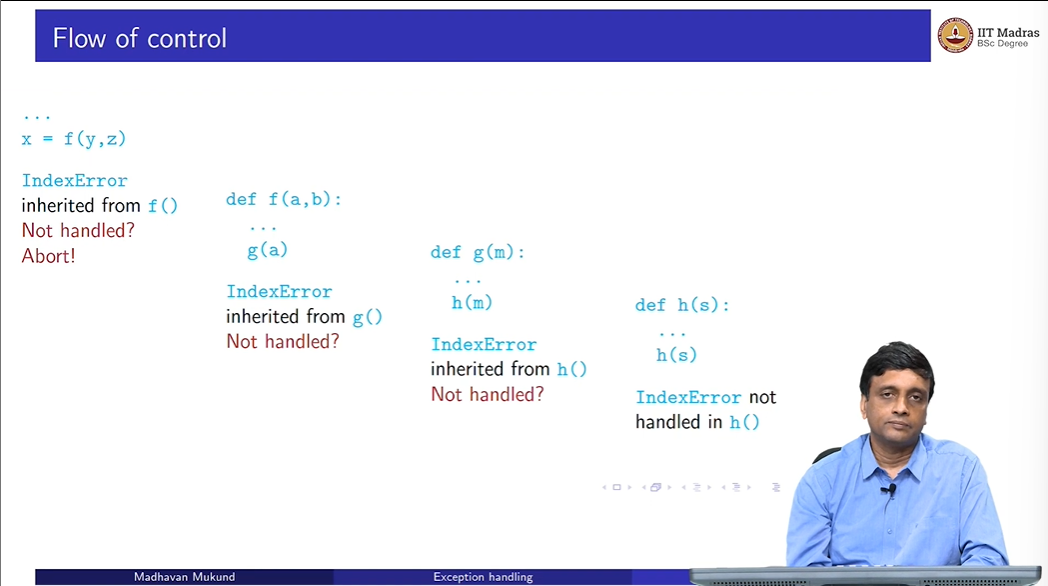

### **CLASSES AND OBJECTS**

**Abstract datatype** <br>
- Stores some information.
- Designated functions to manipulate the information.
- For instance: `stack` : last-in, first-out, `push()`, `pull()` <br>
- Separate the (private) implementation from the (public) specification

**Class:** <br>
- Template for a datatype
- How data is stored
- How public functions manipulate data

**Object:**
- Concrete instance of template

### **Example: 2D points** <br>
A point has coordinates `(x,y)`
- `__init__()` initializes internal values *x*,*y*
- First parameter is always `self`
- Here, by default a point is at `(0,0)`


In [ ]:
class Point:
  def __init__(self, a=0, b=0):
    self.x = a
    self.y = b

Translation: Shift a point by ($\Delta$x, $\Delta$y)
- `(x,y)` -> (x + $\Delta$x, y + $\Delta$y)

In [ ]:
def translate(self, deltax, deltay): # part of the class defn.
  self.x += deltax
  self.y += deltay

Distance from origin: 
- *d* = $\sqrt{x^2 + y^2}$


In [ ]:
def odistance(self):
  import math
  d = math.sqrt(self.x * self.x + self.y * self.y)
  return d

In [ ]:
p = Point(3,4)
q = point(7,10)
# print(p + q) will be an error
p.odistance(), q.odistance() 

**Polar coordinates:** <br>
(*r*, $\theta$) instead of `(x,y)`
- *r* = $\sqrt{x^2 + y^2}$
- $\theta$ = $\tan^{-1}(y/x)$


In [ ]:
import math
class Point:
  def __init__(self, a=0, b=0):
    self.r = math.sqrt(a*a + b*b)
    if a == 0: # theta = pi/2
      self.theta = math.pi/2
    else:
      self.theta = math.atan(b/a)

In [ ]:
def odistance(self): # Distance from origin is just r
  return self.r

Translation with polar coordinates: <br>
- Convert (*r*, $\theta$) to `(x,y)`
- *x* = *r* $\cos\theta$, *y* = *r* $\sin\theta$
- Recompute *r* , $\theta$ from (x + $\Delta$x, y + $\Delta$y)

In [ ]:
def translate(self, deltax, deltay):
  x = self.r * math.cos(self.theta)
  y = self.r * math.sin(self.theta)
  x += deltax
  y += deltay
  self.r = math.sqrt(x*x + y*y)
  if x == 0:
    self.theta = math.pi/2
  else:
    self.theta = math.atan(y/x)

In [ ]:
p = Point(3,4)
q = Point(7,10)
p.odistance(), q.odistance()
p.r, p.theta

**Interface has not changed!**
- User need not be aware whether representation is `(x,y)` or (*r*, $\theta$)

**Special functions:** <br>
- `__init__()` -  constructor
- `__str__()` -  convert object to string
  - `str(o)` == `o.__str__()`
  - Implicitly invoked by `print()`


In [ ]:
def __str__(self):
  return '('+str(self.x)+','+str(self.y)+')'

- `__add__()`
  - Implicitly invoked by `+`

In [ ]:
def __add__(self.p):
  return Point(self.x + p.x, self.y + p.y)

Similarly, 
- `__mult__()` invoked by `*`
- `__lt__()` invoked by `<`
- `__ge__()` invoked by `>=`
- ...

### **TIMING OUR CODE:**

- How long our code takes to execute depends on the language we use.
- `time` library with various functions.



- `perf.time()` is a performance counter
  - Absolute value of `perf.time()` is not meaningful
  - Compaer two consecutive readings to get an interval
  - Default unit is seconds

In [ ]:
import time
start = time.perf_counter()

# Execute some code

end = time.perf_counter() 
elapsed = end - start

A timer object:
- Create a timer class
- Two internal values
  - `_start_time`
  - `_elapsed_time`
- `start` starts the timer
- `stop` records the elapsed time

In [ ]:
import time
class Timer:
  def __init__(self):
    self._start_time = 0
    self._elapsed_time = 0
  def start(self):
    self._start_time = time.perf_counter()
  def stop(self):
    self._elapsed_time = time.perf_counter() - self._start_time
  def elapsed(self):
    return self._elapsed_time

### **WHY EFFICIENCY MATTERS?**

**Real world problem:** <br>
- Every SIM card needs to be linked to an Aadhaar Card. 
- Validate the Aadhaar details for each SIM card.
- Simple nested loop: <br>
`for each SIM card S:` <br>
&nbsp;&nbsp;&nbsp;&nbsp;`for each Aadhaar number A:` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`check if Aadhaar details of S match A`
- How long will this take?
  - *M* SIM cards, *N* Aadhaar cards
  - Nested loops iterate *M* . *N* times
- What are *M* and *N*?
  - Almost everyone in India has an Aadhaar card: *N* > $10^9$
- Number of SIM cards registered is similar: *M* > $10^9$
- Assume *M* = *N* = $10^9$
- Nested loops execute $10^{18}$ times.
- Python can perform $10^7$ operations in a second (calculated from Timer class)
- This will take at least $10^{11}$ seconds.
  - $10^{11}$/60 	$\approx$ 1.67 x $10^9$ minutes
  - (1.67 x $10^9$)/60 $\approx$ 2.8 x $10^7$ hours
  - (2.8 x $10^7$)/60 $\approx$ 1.17 x $10^6$ days
  - (1.17 x $10^6$)/365 $\approx$ 3200 years!


**Halving strategy:**
- Interval of possibilities.
- Query midpoint - halves the intervals
- Keeps checking the mid points and halving the intervals till it finds a match
- Interval shrinks, time taken less!

**How to solve this?** <br>
- Assume Aadhaar details are sorted by Aadhaar number.
- Use halving strategy to check each SIM card. <br>
`for each SIM card S:` <br>
&nbsp;&nbsp;&nbsp;&nbsp;`probe sorted Aadhaar list to`  <br>
&nbsp;&nbsp;&nbsp;&nbsp;`check Aadhaar details of S`
- Halving 10 times reduces the interval by a factor of 1000 because $2^{10}$ = 1024
- After 10 queries, interval shrinks to $10^6$
- After 20 queries, interval shrinks to $10^3$
- After 30 queries, interval shrinks to $1$
- Total time $\approx$ $10^9$ x 30 seconds $\approx$ 50 minutes!
- Of course to achieve this, we have to first sort the Aadhaar cards.
- **Conclusion:** *Arranging the data results in a much more efficient solution. Both algorithms and data structures matter.*